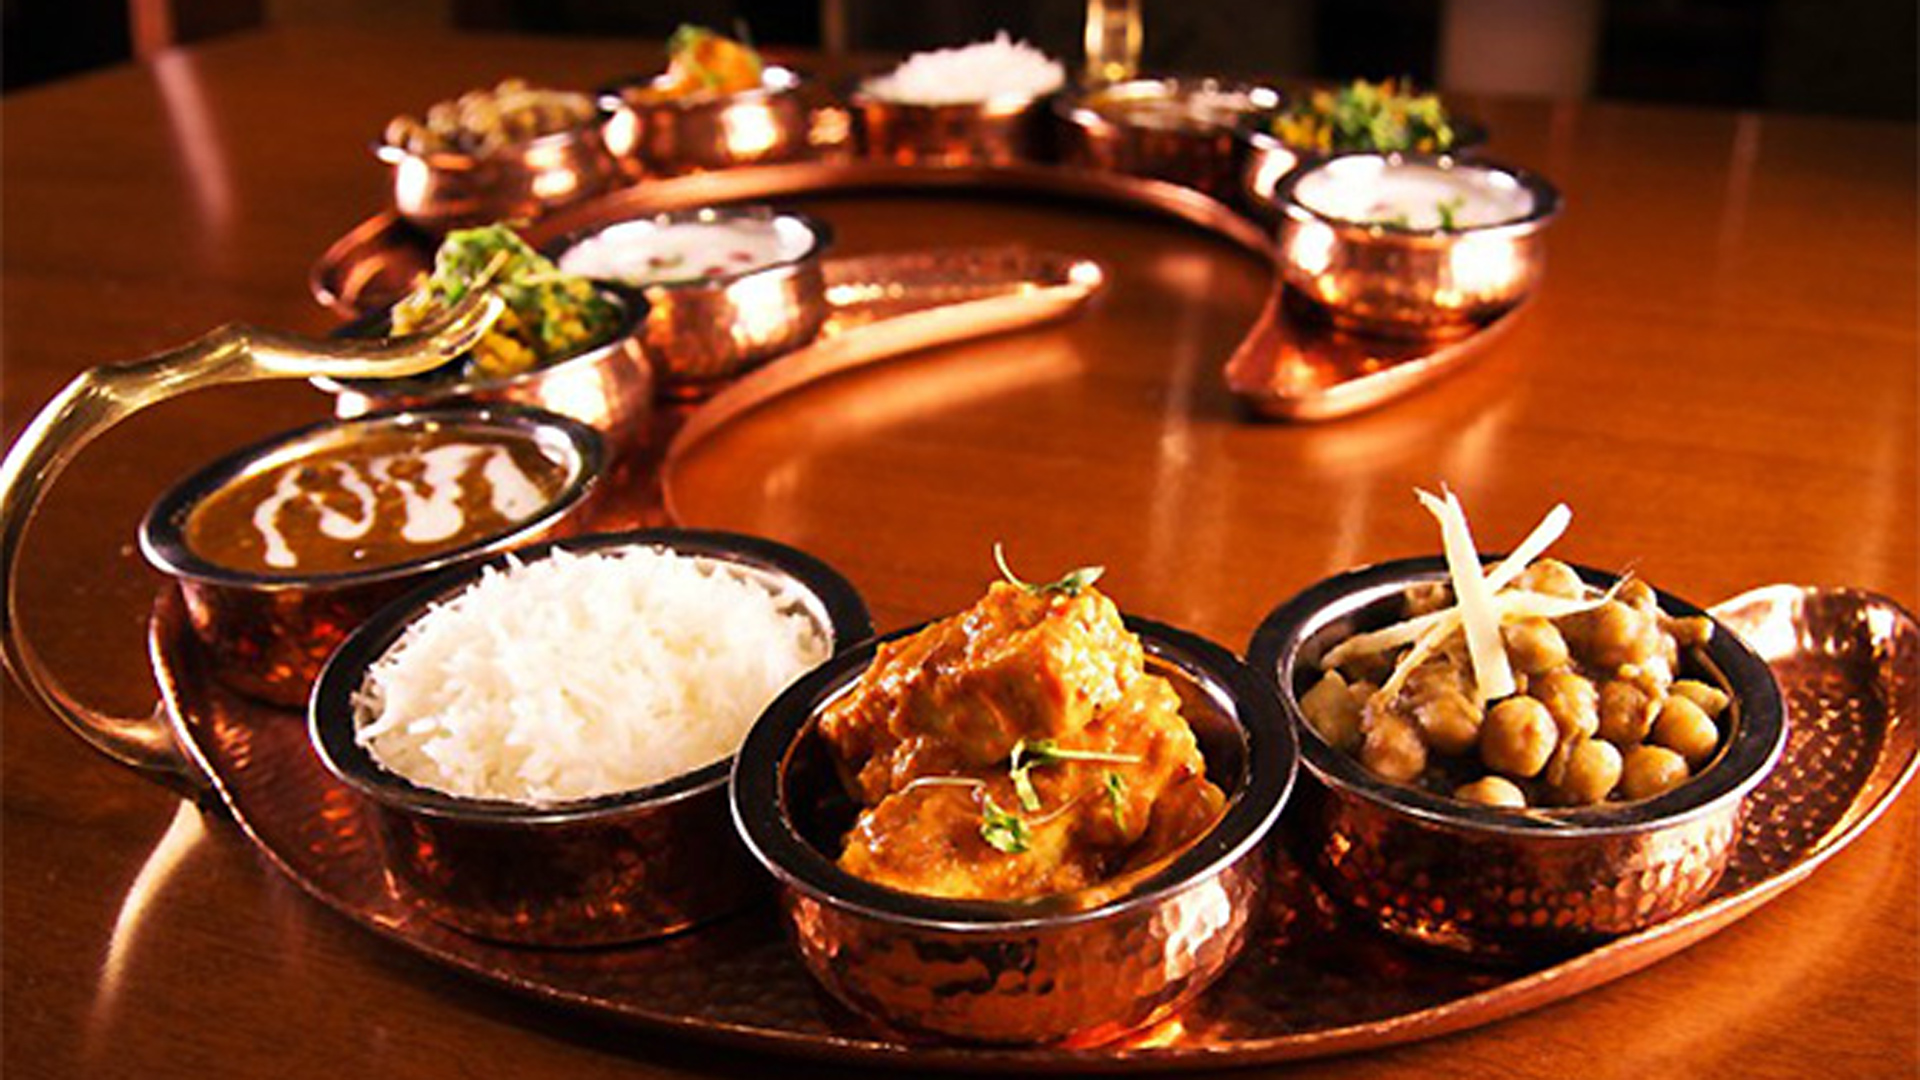

In [15]:
from IPython.display import Image
from IPython.core.display import HTML 
image_1 = 'C:\\Users\\anish\\Documents\\DATA_SCIENCE_JUPYTER\\Indian Food Project\\indian-cuisine.jpg'
Image(filename= image_1, width=600, height=600, unconfined=True)

In [179]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import random
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots
init_notebook_mode(connected=True)
from wordcloud import WordCloud , ImageColorGenerator
from PIL import Image

In [17]:
data= pd.read_csv("C:\\Users\\anish\\Documents\\DATA_SCIENCE_JUPYTER\\Indian Food Project\\indian_food.csv")
data.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East


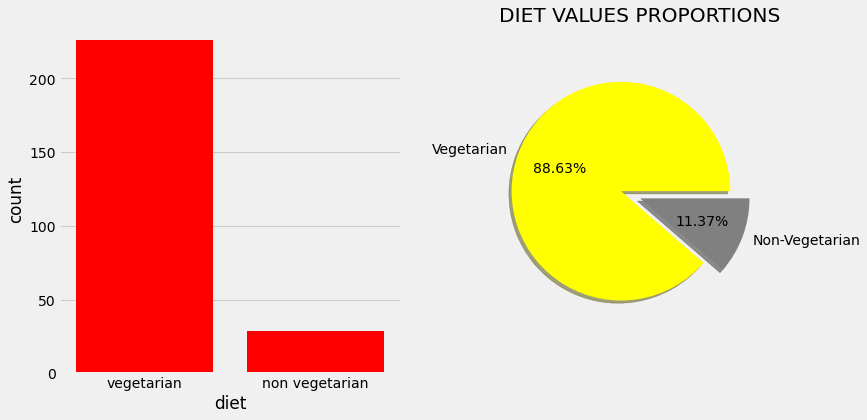

In [18]:

plt.rcParams['figure.figsize'] = (12,6)
plt.style.use('fivethirtyeight')

#SUBPLOT(1,2,1)
plt.subplot(1,2,1)
sns.countplot(data['diet'], color= "red", saturation= 5)

#SUBPLOT(1,2,2)
plt.subplot(1,2,2)
diet = data['diet'].value_counts()
plt.pie(diet,labels= ['Vegetarian','Non-Vegetarian'], autopct = '%.2f%%', 
        colors= ("yellow", "grey"), explode= (0.15,0), radius= 0.8, shadow= True)
plt.title("DIET VALUES PROPORTIONS")
plt.show()

However, different Non_veggy dishes come and go, traditional vegetarian dishes will always dominate the nation. Perfect!

In [163]:
pd.crosstab(data['state'], data['diet']).style.bar(color='blue')

diet,non vegetarian,vegetarian
state,,
-1,0,24
Andhra Pradesh,0,10
Assam,10,11
Bihar,0,3
Chhattisgarh,0,1
Goa,1,2
Gujarat,0,35
Haryana,0,1
Jammu & Kashmir,0,2


# SWEET_ANALYSIS

In [19]:
x=data[data["flavor_profile"]=="sweet"].reset_index()
y=x[["index", "region", "flavor_profile", "name"]]
z= y["region"].value_counts().reset_index()
z.columns=['region', 'counts']


fig = make_subplots(
    rows=1, cols=2,subplot_titles=('NUMBER OF SWEETS',"Sweet proportion (Regionwise)" ''),
    specs=[[{'type': 'indicator'},{'type': 'pie'}  ]] )

#1
total_dishes= x['name'].shape[0]
total_dishes

fig.add_trace(go.Indicator(
    mode = 'number',
    value = int(total_dishes)),row=1, col=1)

#2
fig.add_trace(go.Pie(labels=z["region"], 
                     values=z['counts'],textinfo='percent',
                    marker= dict(colors=['green','red'])),row=1, col=2, )


fig.show()



Let's see which state is having the highest sweet lovers

In [36]:
state_region= x["state"].value_counts().reset_index()
state_region. columns=["State", 'Counts']

bar_plot = px.bar(state_region,y='State',x='Counts',
             orientation='h',color='State',
            labels={'State':'STATES','Counts':'COUNTS OF SWEETS'})
bar_plot.show()




Even though West region is having the highest SWEET proportions at 26.4%, 
but West Bengal is the highest sweet loving state, which is East. Wonderful, isn't it?
Perfect!

# SPICE_ANALYSIS

In [48]:
x1=data[data["flavor_profile"]=="spicy"].reset_index()
x1=x1[["index", "region", "flavor_profile", "name"]]
spicy= x1["region"].value_counts().reset_index()
spicy.columns=['region', 'counts']

fig = make_subplots(
    rows=1, cols=2,subplot_titles=('NUMBER OF SWEETS',"Spice proportion (Regionwise)" ''),
    specs=[[{'type': 'indicator'},{'type': 'pie'}  ]] )

#1
total_dishes= x1['name'].shape[0]
total_dishes

fig.add_trace(go.Indicator(
    mode = 'number',
    value = int(total_dishes)),row=1, col=1)

#2
fig.add_trace(go.Pie(labels=spicy["region"], 
                     values=spicy['counts'],textinfo='percent',
                    marker= dict(colors=['green','red'])),row=1, col=2)


fig.show()

In [121]:
x2=data[data["flavor_profile"]=="spicy"].reset_index()
x2= data["state"].value_counts().reset_index()
x2.columns=["State", "Counts"]
bar_plot1= px.bar(x2, y="State",x='Counts',
             orientation='h',color='State',
            labels={'State':'STATES','Counts':'COUNTS OF SPICES'})
bar_plot1.show()


As the West region dominates the Spices at 30.8% , Gujarat is at the peak of the throne. Perfect!

In [164]:
def state_dish(x):
    return data[data['state']==x][['name','diet','flavor_profile']]

In [165]:
state_dish('Kerala')

,name,diet,flavor_profile
44,Kuzhi paniyaram,vegetarian,sweet
125,Avial,vegetarian,spicy
131,Kanji,vegetarian,-1
137,Beef Fry,non vegetarian,spicy
147,Papadum,vegetarian,spicy
148,Paravannam,vegetarian,spicy
155,Puttu,vegetarian,-1
160,Theeyal,vegetarian,-1


In [174]:
state_dish("Karnataka")

,name,diet,flavor_profile
40,Dharwad pedha,vegetarian,sweet
45,Mysore pak,vegetarian,sweet
46,Obbattu holige,vegetarian,sweet
126,Bisi bele bath,vegetarian,spicy
140,Koshambri,vegetarian,spicy
157,Sandige,vegetarian,-1


In [120]:
#PREPARATION TIME V/S COOKING TIME GRAPH
prep_cook = px.scatter(data,x='cook_time',y='prep_time',color='diet',
                 color_discrete_sequence=['green','red'], hover_data = ['name'],
                 labels={
                     'cook_time': 'Cooking Time(minutes)',
                     'prep_time': 'Preparation Time(minutes)'
                 })
prep_cook.show()

# SNACK_ANALYSIS

In [196]:
snack= data[data["course"]=="snack"].value_counts().reset_index()
snack_1= snack["region"].value_counts().reset_index()
snack_1.columns=["Region", "Counts"]


snack_sunburst = px.sunburst(snack_1, path=['Region'],values='Counts',color ='Counts')
snack_sunburst.show()

It looks like West region people are more busy in dealing with snack, they are dominating too, isn't it? Perfect!

WORDCLOUD OF INGREDIENTS

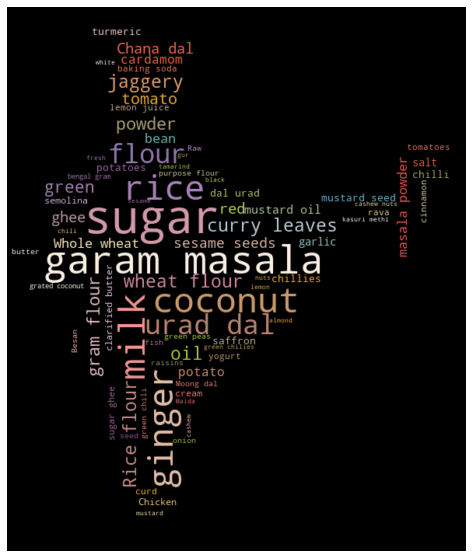

In [178]:
ingredients = []
for i in range(0,len(data)):
    text = data['ingredients'][i].split(',')
    text = ','.join(text)
    ingredients.append(text)
    text = ' '.join(ingredients)

india_coloring = np.array(Image.open('C:\\Users\\anish\\Documents\\DATA_SCIENCE_JUPYTER\\Indian Food Project\\indianmap.jpg'))

wc = WordCloud(background_color="black", width = 400, height = 400,mask=india_coloring,min_font_size=8)
wc.generate(text)

image_colors = ImageColorGenerator(india_coloring)

plt.figure(figsize = (10, 10))
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis('off')
plt.show()

# MAIN_COURSE_ANALYSIS

In [141]:
main_course= data[data["course"]=="main course"].reset_index()
main_course.head()

,index,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,46,Obbattu holige,"Maida flour, turmeric, coconut, chickpeas, jag...",vegetarian,180,60,sweet,main course,Karnataka,South
1,64,Maach Jhol,"Fish, potol, tomato, chillies, ginger, garlic",non vegetarian,10,40,spicy,main course,Assam,North East
2,65,Pork Bharta,"Boiled pork, onions, chillies, ginger and garlic",non vegetarian,-1,-1,spicy,main course,Tripura,North East
3,67,Galho,"Rice, axone, salt, water, chillies, pork",non vegetarian,5,15,spicy,main course,Nagaland,North East
4,68,Aloo gobi,"Cauliflower, potato, garam masala, turmeric, c...",vegetarian,10,20,spicy,main course,Punjab,North


In [150]:
main_course_south= main_course[main_course["region"]=="South"].reset_index()
main_course_south.head()

,level_0,index,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,0,46,Obbattu holige,"Maida flour, turmeric, coconut, chickpeas, jag...",vegetarian,180,60,sweet,main course,Karnataka,South
1,11,75,Biryani,"Chicken thighs, basmati rice, star anise, swee...",non vegetarian,30,120,spicy,main course,Telangana,South
2,49,125,Avial,"Raw banana, elephant foot yam, long beans, tin...",vegetarian,30,45,spicy,main course,Kerala,South
3,50,126,Bisi bele bath,"Split pigeon peas, chana dal, urad dal, green ...",vegetarian,30,45,spicy,main course,Karnataka,South
4,51,127,Currivepillai sadam,"Chana dal, urad dal, fresh coconut, sesame see...",vegetarian,10,20,spicy,main course,Tamil Nadu,South


In [145]:

south_ = go.Figure(data=go.Scatter(x=main_course_south['name'],
                                y=main_course_south['cook_time'],
                                mode='markers',
                                marker_color=main_course_south['cook_time'],
                                text=main_course_south['name'])) # hover text goes here

south_.update_layout(title='SOUTHERN DISHES V/S COOKING_TIME')
south_.show()

WORDCLOUD OF INGREDIENTS OF SOUTH INDIAN DISHES IN SOUTH INDIAN MAP

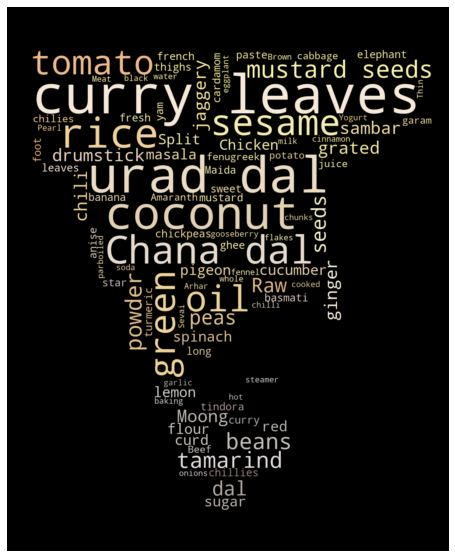

In [207]:

ingredients = []
for i in range(0,len(main_course_south)):
    text = main_course_south['ingredients'][i].split(',')
    text = ','.join(text)
    ingredients.append(text)
    text = ' '.join(ingredients)

india_coloring = np.array(Image.open('C:\\Users\\anish\\Documents\\DATA_SCIENCE_JUPYTER\\Indian Food Project\\southindia.jpg'))

wc = WordCloud(background_color="black", width = 400, height = 400,mask=india_coloring,min_font_size=8)
wc.generate(text)

image_colors = ImageColorGenerator(india_coloring)

plt.figure(figsize = (10, 10))
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis('off')
plt.show()

Curry leaves, coconut, chana, rice and urad seems to be more dominating as the ingredients for 
cooking majority of the South Indian dishes.
Perfect!

In [151]:
main_course_north= main_course[main_course["region"]=="North"].reset_index()
main_course_north.head()

,level_0,index,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,4,68,Aloo gobi,"Cauliflower, potato, garam masala, turmeric, c...",vegetarian,10,20,spicy,main course,Punjab,North
1,5,69,Aloo tikki,"Rice flour, potato, bread crumbs, garam masala...",vegetarian,5,20,spicy,main course,Punjab,North
2,6,70,Aloo matar,"Potato, peas, chillies, ginger, garam masala, ...",vegetarian,5,40,spicy,main course,Punjab,North
3,7,71,Aloo methi,"Potato, fenugreek leaves, chillies, salt, oil",vegetarian,10,40,bitter,main course,Punjab,North
4,8,72,Aloo shimla mirch,"Potato, shimla mirch, garam masala, amchur pow...",vegetarian,10,40,spicy,main course,Punjab,North


In [147]:
north_ = go.Figure(data=go.Scatter(x=main_course_north['name'],
                                y=main_course_north['cook_time'],
                                mode='markers',
                                marker_color=main_course_north['cook_time'],
                                text=main_course_north['name'])) # hover text goes here

north_.update_layout(title='NORTHERN DISHES V/S COOKING_TIME')
north_.show()

Cooking time for majority of the South Indian and North Indian dishes are lying under 60 min.
In both cases, couple of dishes only lying above 60 min. 

South India- Biriyani and Kuzhakattai (above 60 min)
/ North India- Pindi Channa and Rajma Chaval(above 60 min)

Personally, I am very much fond of types of South indian Biriyani, it's worth waiting 120 min, because it's delicious.
Perfect!

In [228]:
WORDCLOUD OF INGREDIENTS OF NORTH INDIAN DISHES IN NORTH INDIAN MAP

SyntaxError: invalid syntax (<ipython-input-228-fc628f52a953>, line 1)

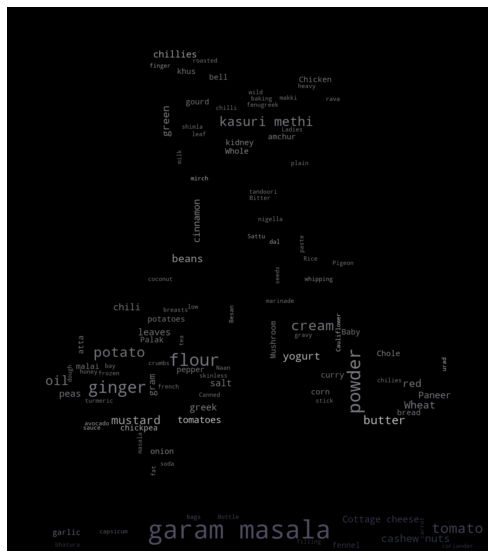

In [227]:

ingredients = []
for i in range(0,len(main_course_north)):
    text = main_course_north['ingredients'][i].split(',')
    text = ','.join(text)
    ingredients.append(text)
    text = ' '.join(ingredients)

india_coloring = np.array(Image.open('C:\\Users\\anish\\Documents\\DATA_SCIENCE_JUPYTER\\Indian Food Project\\northindia.jpg'))

wc = WordCloud(background_color="Black", width = 400, height = 400,mask=india_coloring,min_font_size=8)
wc.generate(text)

image_colors = ImageColorGenerator(india_coloring)

plt.figure(figsize = (10, 10))
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis('off')
plt.show()

Garam masala plays a vital role for cooking majority of the North Indian dishes. Perfect!